# Finding threshold and initial step counting Week 2

In [275]:
# Imports
import os
import pandas as pd
import numpy as np
from numpy import *

import importlib
import count_steps
importlib.reload(count_steps)


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn
import sensormotion as sm
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy import signal

In [276]:
# Reads all csv files in the data csvs folder and saves the dataframes and details in a tuple list
dfs = []

for filename in os.listdir('../data_csvs/'):
    if filename.endswith(".csv"):
        name = '../data_csvs/' + filename
        with open(name) as f:
            head = [next(f).rstrip().split('# ')[1] for x in range(10)]
            #for l in head:
            #    print(l)
            df = pd.read_csv(name, header=11)
            item = (head, df)
            dfs.append(item)

In [277]:
# Displaying info of all dataframes
for d in dfs:
    des = d[0]
    df = d[1]
    #print(des)
    #df.plot(y=['accel_x', 'accel_y', 'accel_z'], figsize=(10,5))
    #df.plot(y=['gyro_x', 'gyro_y', 'gyro_z'], figsize=(10,5))
    #plt.show()
    #print('\n')

In [294]:
#bdf = pd.read_csv('../data_csvs/100_walk_faster.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/PDIoT_B_20190922T153213.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/test1.csv',  header=11)
bdf = pd.read_csv('../data_csvs/51_ari_new.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/Ilie_walk_30steps.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/test_walking_100.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/emergency_stairs_up.csv',  header=11)
#bdf.plot(y=['accel_x'], figsize=(15,5))
#bdf.plot(y=['gyro_x'], figsize=(15,5))
#plt.show()


xacc_df = pd.DataFrame(bdf['accel_x'], columns=['accel_x'])
yacc_df = pd.DataFrame(bdf['accel_y'], columns=['accel_y'])
zacc_df = pd.DataFrame(bdf['accel_z'], columns=['accel_z'])

xgy_df = pd.DataFrame(bdf['gyro_x'], columns=['gyro_x'])


In [295]:
#xacc_df['threshold'] = xacc_df[]
th = (float(max(xacc_df.values)) + float(min(xacc_df.values)))/2
th

1.4180000000000001

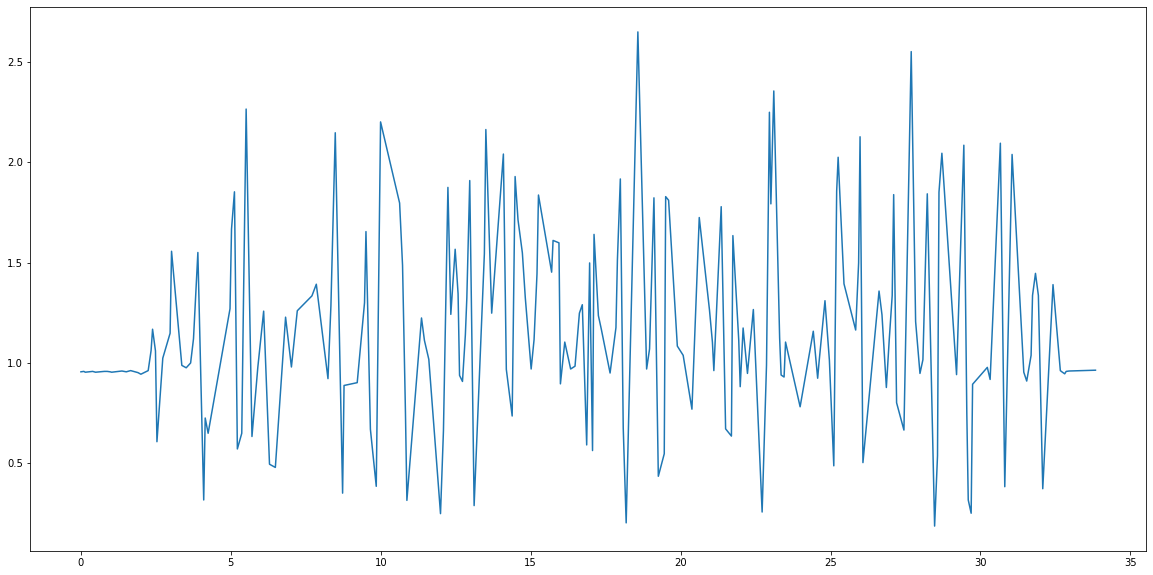

In [308]:
peaks, _ = find_peaks(xacc_df['accel_x'])
fig = plt.figure(figsize=(20,10))

d = {'accel_x': []}
revamped_df = pd.DataFrame(data=d)
# i=0
# for x in xacc_df['accel_x']:
#     if x > 1.5:
#         revamped_df.loc[i] = 1.5
#     else:
#         revamped_df.loc[i] = x
    
#     if x<0.7:
#         revamped_df.loc[i] = 0.7
#     i+=1


plt.plot((bdf['timestamp']-bdf['timestamp'].iloc[0])/1000, xacc_df['accel_x'])
#plt.plot(peaks, xacc_df['accel_x'][peaks], "x")
plt.plot(np.mean(xacc_df['accel_x']), "--", color="k")
plt.show()

In [304]:
count_steps.run(revamped_df,plot=True)

ValueError: The length of the input vector x must be greater than padlen, which is 63.

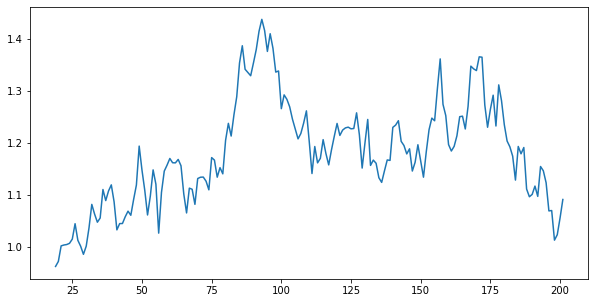

In [299]:
temp = xacc_df['accel_x'].rolling(window=20).mean()
fig = plt.figure(figsize=(10,5))
plt.plot(temp)

90
Steps for principal component 1: 90


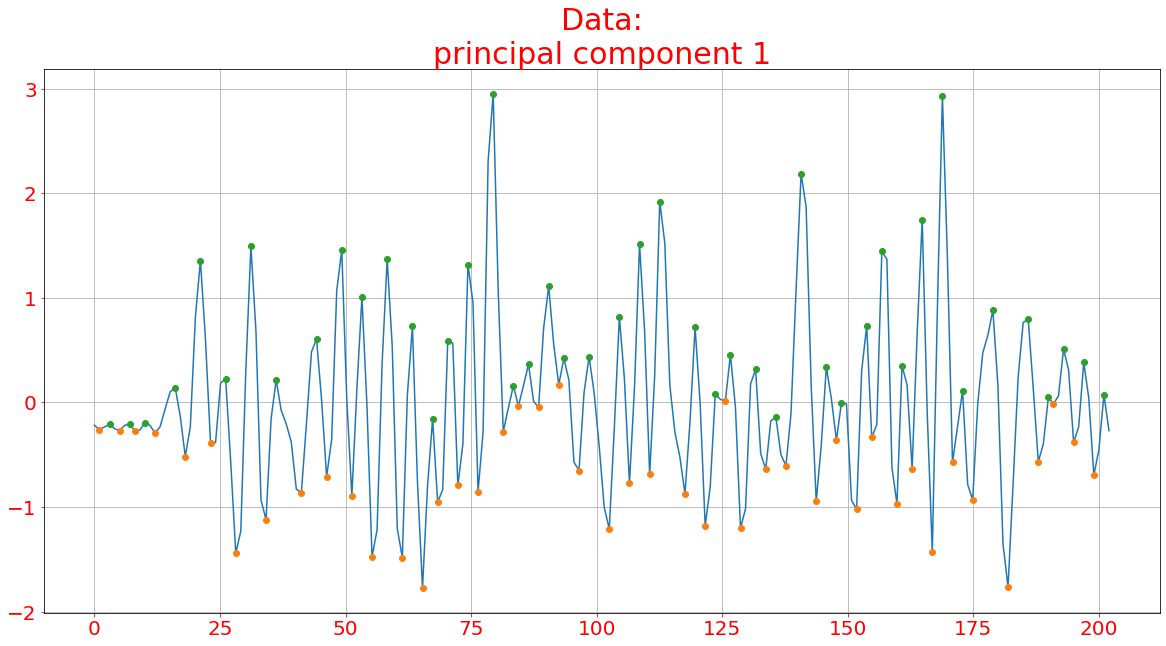

90

In [283]:
#applying pca
pd_merge = pd.concat([xacc_df,yacc_df,zacc_df,xgy_df],axis=1)
#pd_merge = pd_merge.values.tolist()
features = pd_merge.columns.values
x = pd_merge.loc[:, features].values
x = StandardScaler().fit_transform(x) #normalizing the features
features_labels = np.append(features,'label')
pca_dataset = features_labels
#print(type(features_labels))

pca_axes = PCA(n_components=1)
principalComponents_axes = pca_axes.fit_transform(x)

principal_axes_Df = pd.DataFrame(data = principalComponents_axes
             , columns = ['principal component 1'])#, 'principal component 2'])

principal_axes_Df.tail()
count_steps.run(principal_axes_Df,plot=True) ##need 0.8 threshold


78
Steps for accel_x: 78


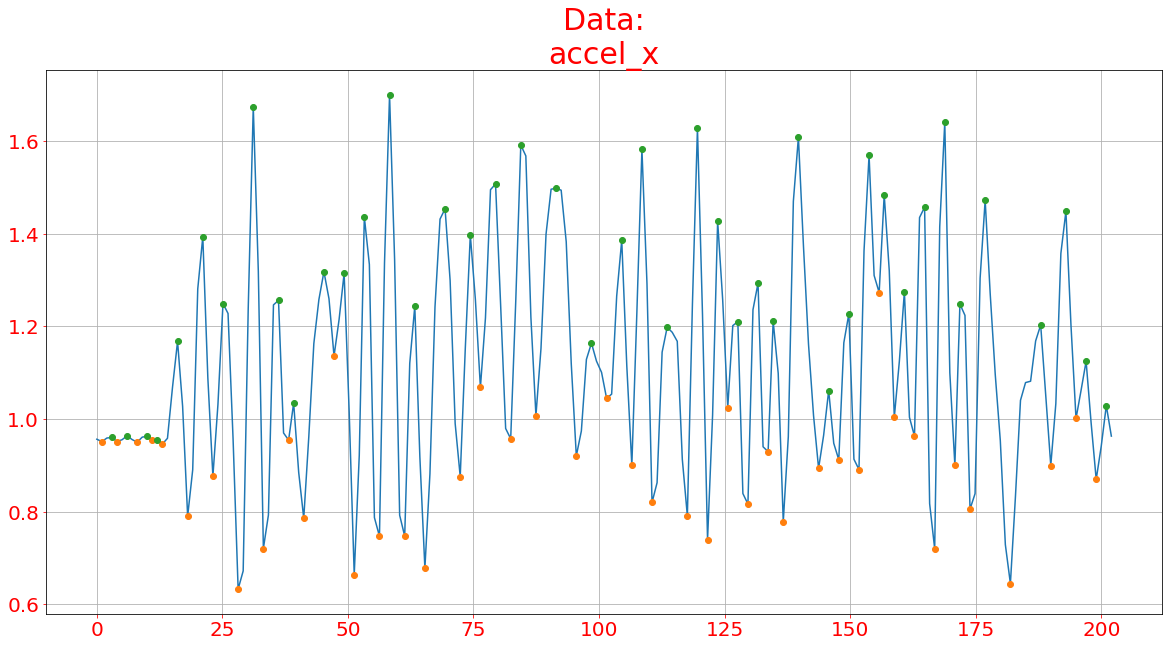

78

In [284]:
# apply butter filter
#import count_steps
# dfa = xacc_df
pd_merge = pd.concat([xacc_df,yacc_df,zacc_df],axis=1)
pd_merge = pd_merge.values.tolist()

d = {'mag_ax': []}
mag_df = pd.DataFrame(data=d)
i =0
for x,y,z in pd_merge:
    i += 1
    mag_df.loc[i]=(sqrt(x*x + z*z + y*y))
#     print(x,y,z)
mag_df_rounded = mag_df.round(4)

# revamped_df = pd.DataFrame(data=d)
# i=0
# for x in xacc_df['accel_x']:
#     if x > 1.5:
#         revamped_df.loc[i] = 1.5
#     else:
#         revamped_df.loc[i] = x
#     i+=1
    
count_steps.run(revamped_df,plot=True)
#mag_df.values
# xacc_df
# count_steps.run(xacc_df,plot=True)
# average_xyz=(count_steps.run(xacc_df)+count_steps.run(yacc_df,)+count_steps.run(zacc_df))/3
# print(average_xyz)
# measure average of step amplitudes, minus 3 or 4 times the standard deviation of the amplitudes of walking
